In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [94]:
plt.style.use('seaborn')

In [95]:
dfx = pd.read_csv("Logistic_X_Train.csv") ## dfx is a dataframe
dfy = pd.read_csv("Logistic_Y_Train.csv")

print(type(dfx))
print(type(dfx.values)) ## dfx.values is a numpy array

print(dfx.values.shape) ## (99,1)
print(dfy.values.shape) ## (99,1)
var = dfx.values.shape[1]
print(var)
x = dfx.values
y = dfy.values.reshape(-1,) ## (99,)
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(3000, 3)
(3000, 1)
3
(3000, 3) (3000,)


In [103]:
def hypothesis(x,theta,b):
    '''accepts input vector x, input weight vector w and bias b'''
    
    h = np.dot(x,theta) + b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(y_true,x,w,b):
    
    m = x.shape[0]
    
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(x[i],w,b) 
        err += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
        
    
    return -err/m


def get_grads(y_true,x,w,b):
    
    grad_w = np.zeros(w.shape)
    grad_b = 0.0
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        
        grad_w += (y_true[i] - hx)*x[i]
        grad_b +=  (y_true[i]-hx)
        
    
    grad_w /= m
    grad_b /= m
    
    return [grad_w,grad_b]


# One Iteration of Gradient Descent
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_grads(y_true,x,w,b)
    
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence = hypothesis(x,w,b)
    if confidence < 0.5:
        return 0.0
    else:
        return 1.0
    
def get_acc(x_tst,y_tst,w,b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]
    

In [104]:
loss = []
acc = []

W = 2*np.random.random((x.shape[1],))
b = 5*np.random.random()

In [105]:
for i in range(1000):
    l,W,b = grad_descent(x,y,W,b,learning_rate=0.1)
    acc.append(get_acc(x,y,W,b))
    loss.append(l)

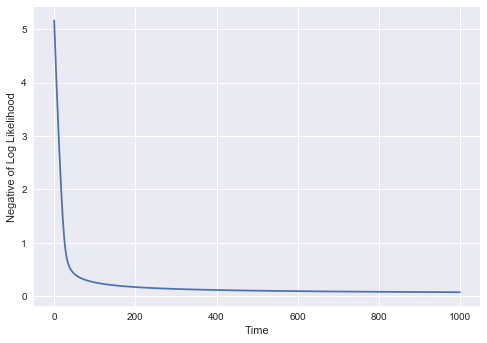

In [106]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

In [107]:
loss[-1]

0.07821768189196049

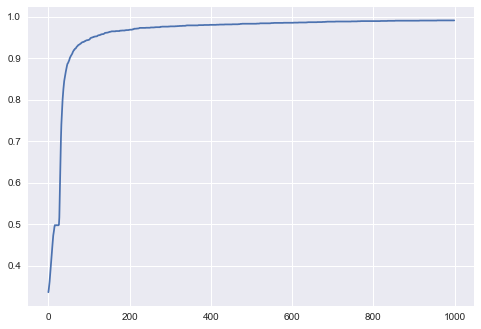

0.9906666666666667


In [108]:
plt.plot(acc)
plt.show()
print(acc[-1])

In [109]:
dfx_tst = pd.read_csv("Logistic_X_Test.csv")
x_tst = dfx.values
print(x_tst.shape)

(3000, 3)
